In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [3]:
filename = '../csv_detection_info/21_1, artrose.csv'
filename_clean = '../csv_detection_info_clean/21_1, artrose.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/21/1, artrose'

In [4]:
detection_df = pd.read_csv(filename)

In [5]:
detection_df

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
206  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
207  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
208  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
209  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
210  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.7230010.3.0.3.5.1.12915466.275122826...      436      575   
1    1.2.276.0.7230010.3.0.3.5.1.12915467.308787911...      327      466   
2    1.2.276.0.82.1.1.1314.1304108018.192.168.1.48....     1588     1746   
3    1.2.276.0.82.1.1.1430.669053978.192.168.20.148...     1320     1504   
4             1.2.276.0.95.16003.20210920.105115.0.dcm      333      570   
..                                                 ...      ...      ...   
206  1.3.51.0.7.811581196.5821.63566.37889.29771.29...      642      801   
207  1.3.51.0.7.816869595.63744.15426.42854.50530.1...      776      981   
208  1.3.51.0.7.903272440.15569.57677.47066.26860.4...      777      973   
209  1.3.6.1.4.1.19179.1.1164174184218686.3.18993.1...      791      937   
210  1.3.6.1.4.1.19179.1.1164174184218686.3.28078.1...      772      915   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
0        556      695    0.999935    21          1    1, artrose  
1        904     1043    0.999985    21          1    1, artrose  
2       1806     1964    0.999988    21          1    1, artrose  
3       1109     1293    0.999995    21          1    1, artrose  
4        887     1123    0.996126    21          1    1, artrose  
..       ...      ...         ...   ...        ...           ...  
206      540      699    1.000000    21          1    1, artrose  
207     1348     1553    0.998437    21          1    1, artrose  
208     1676     1872    0.999926    21          1    1, artrose  
209      719      865    0.999978    21          1    1, artrose  
210      802      944    0.999990    21          1    1, artrose  

[211 rows x 10 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [7]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([13, 24, 28, 29, 30, 59, 85, 92, 131, 178], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

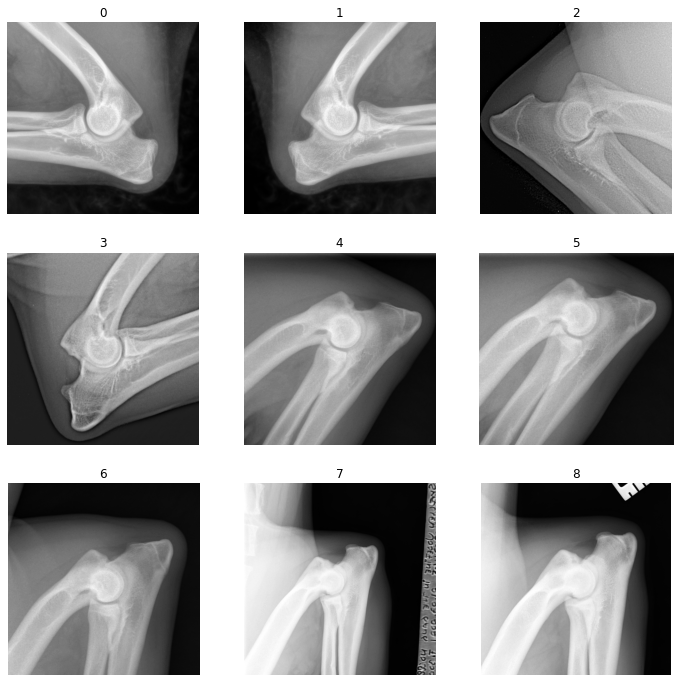

C:\NMBU\TEMP\ipykernel_16128\89006417.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')
C:\NMBU\TEMP\ipykernel_16128\89006417.py:5: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')


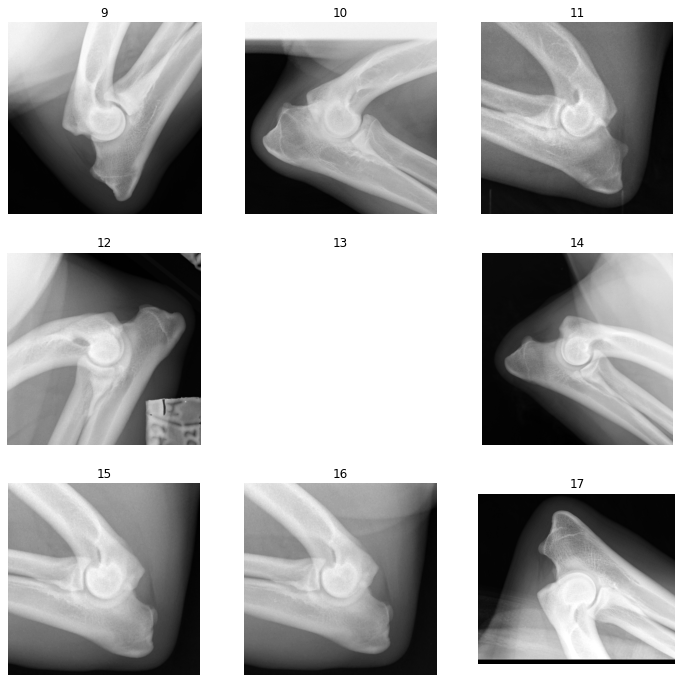

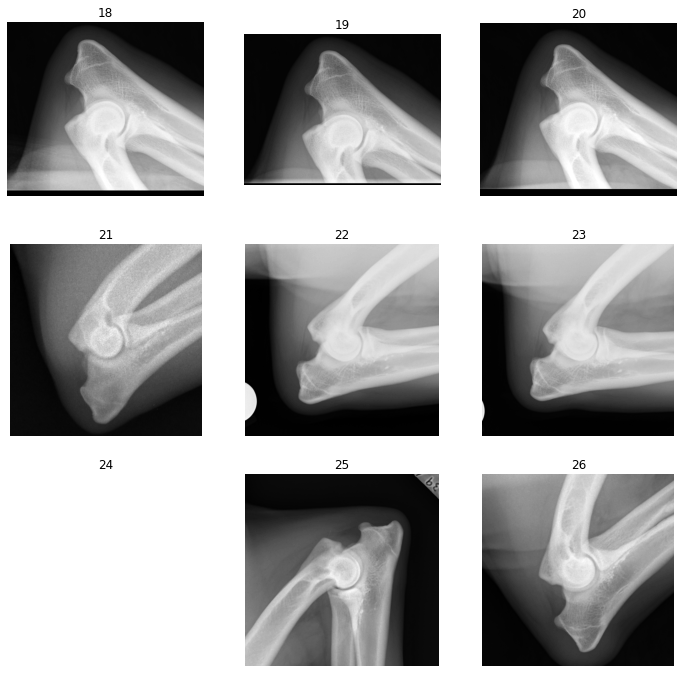

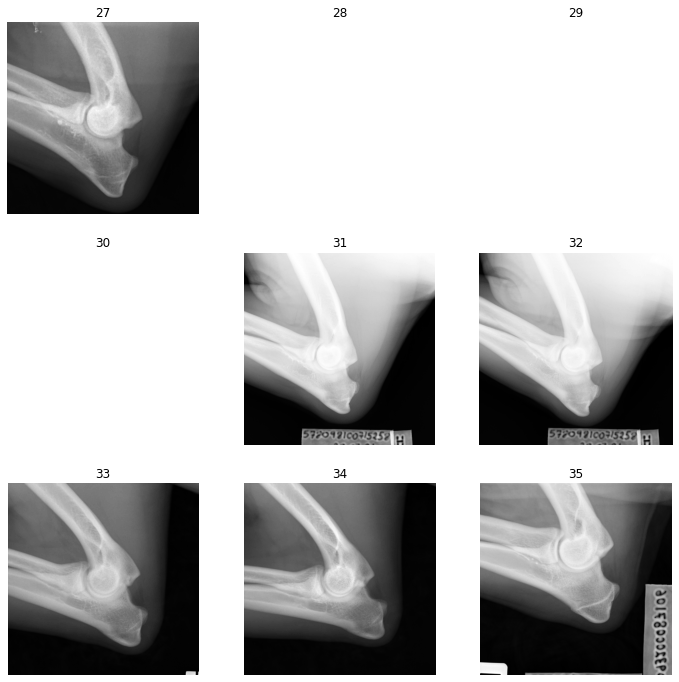

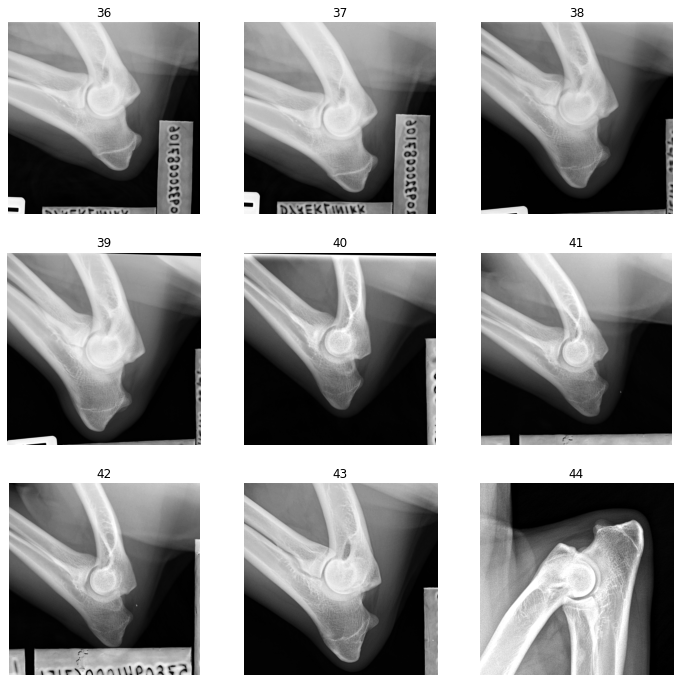

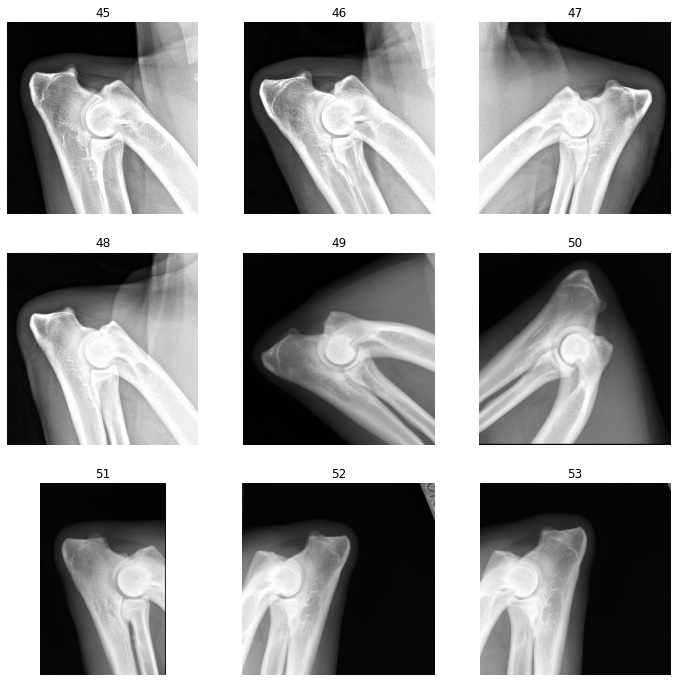

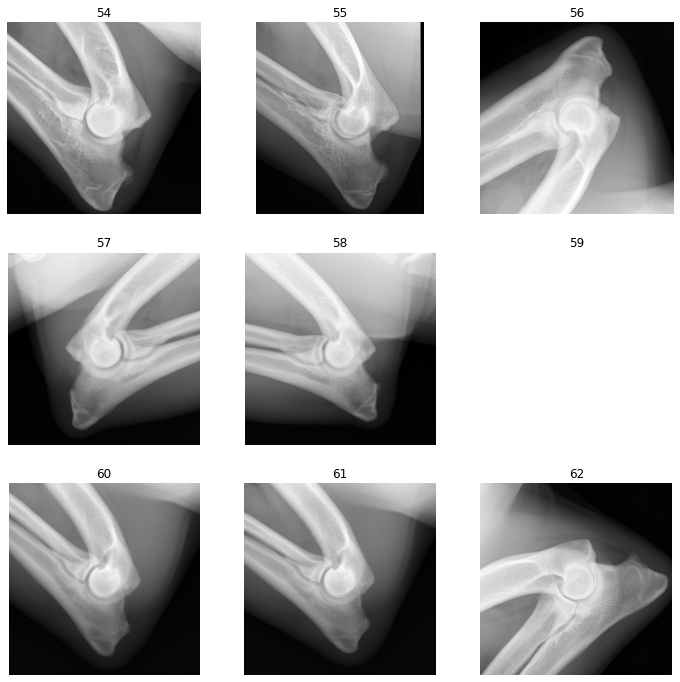

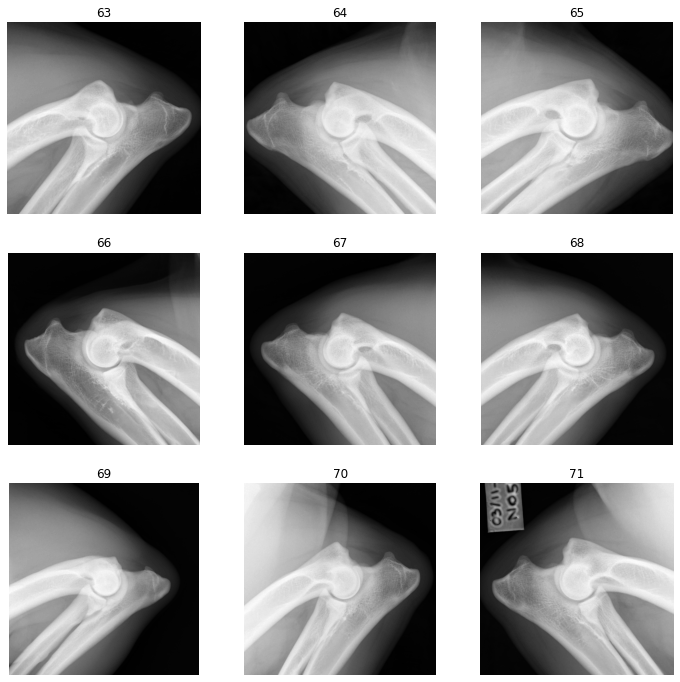

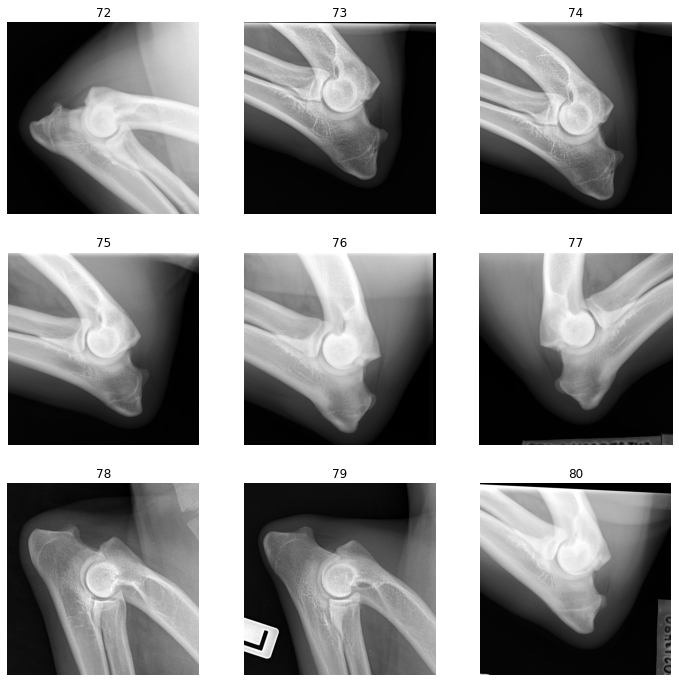

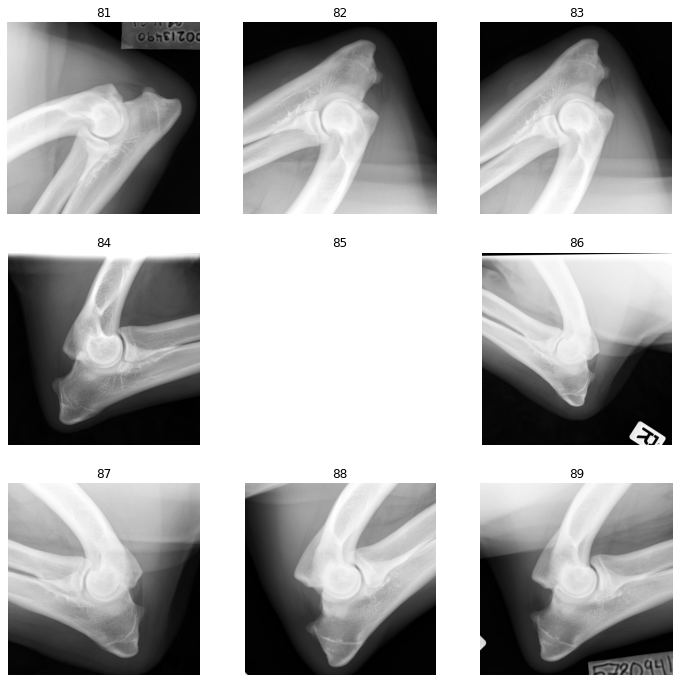

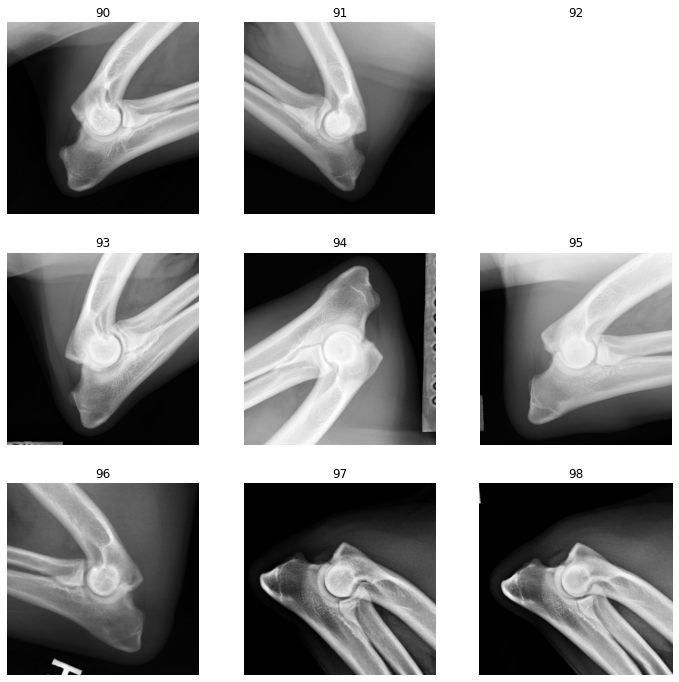

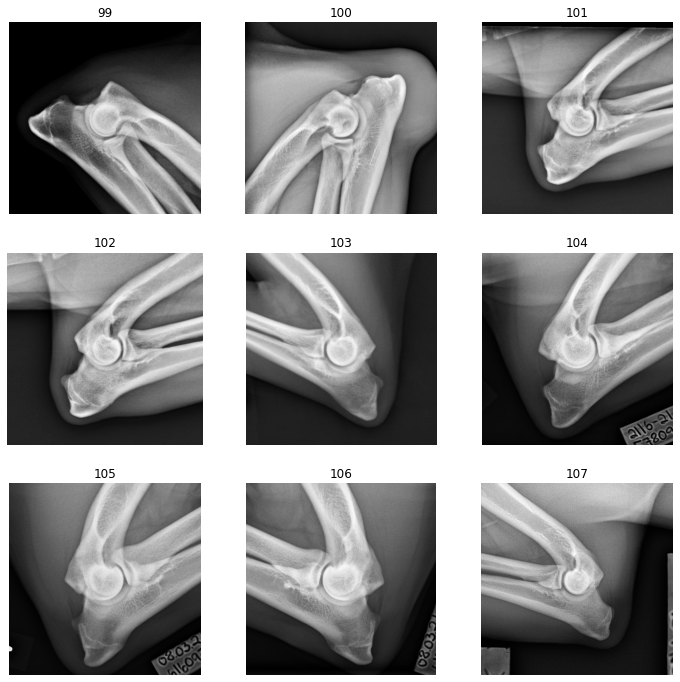

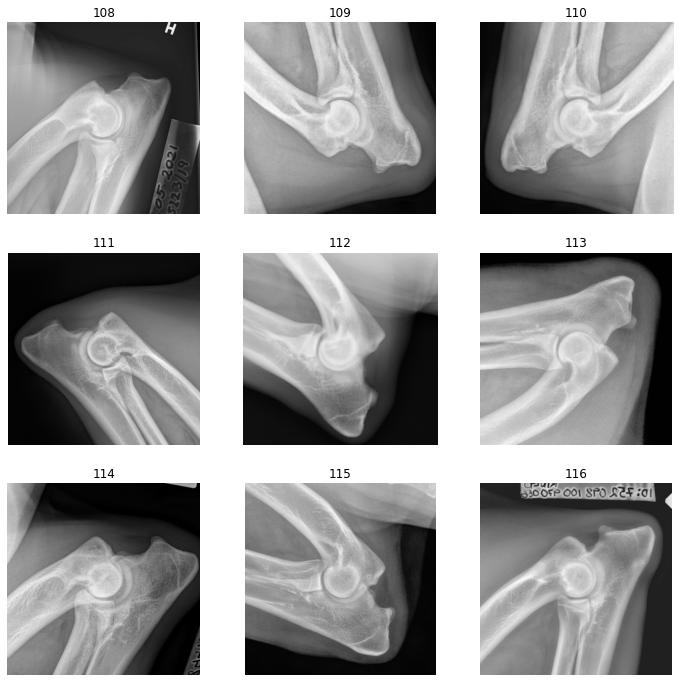

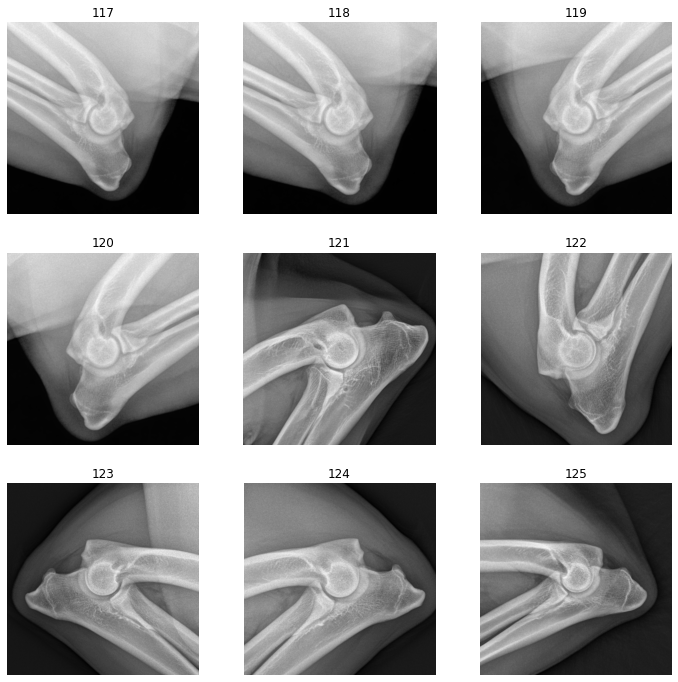

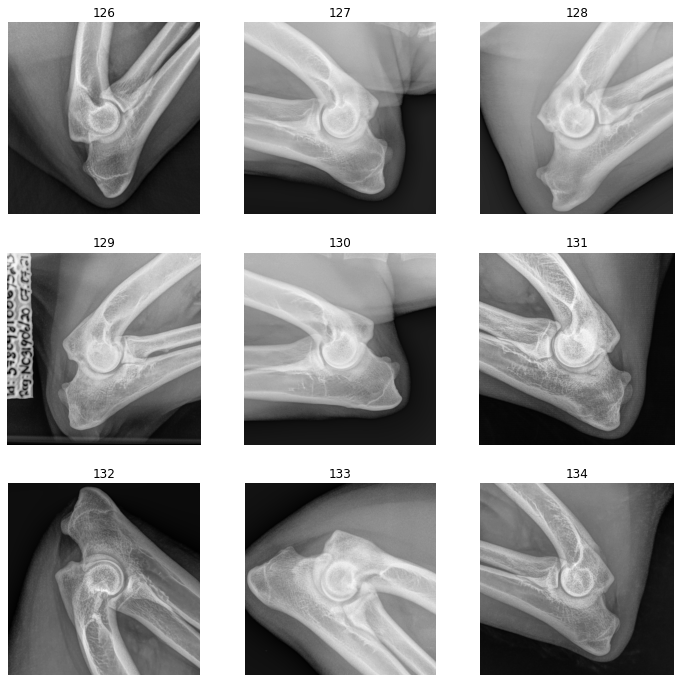

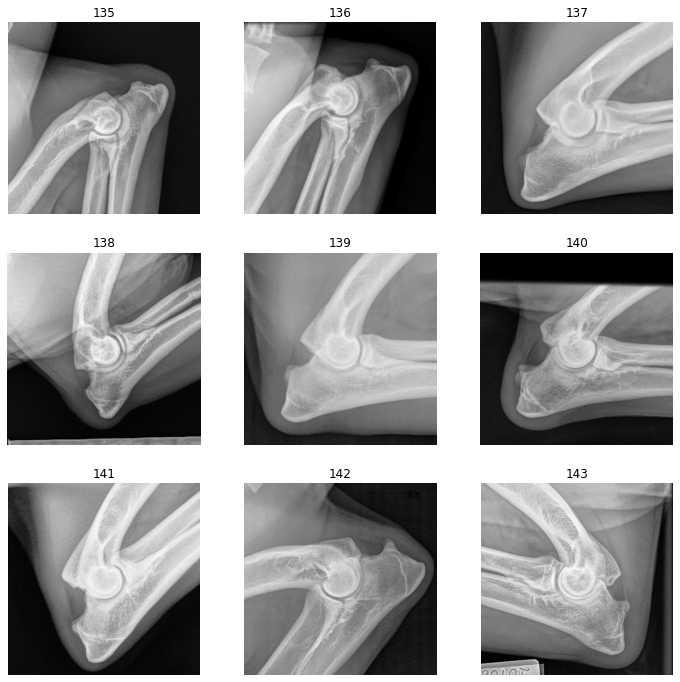

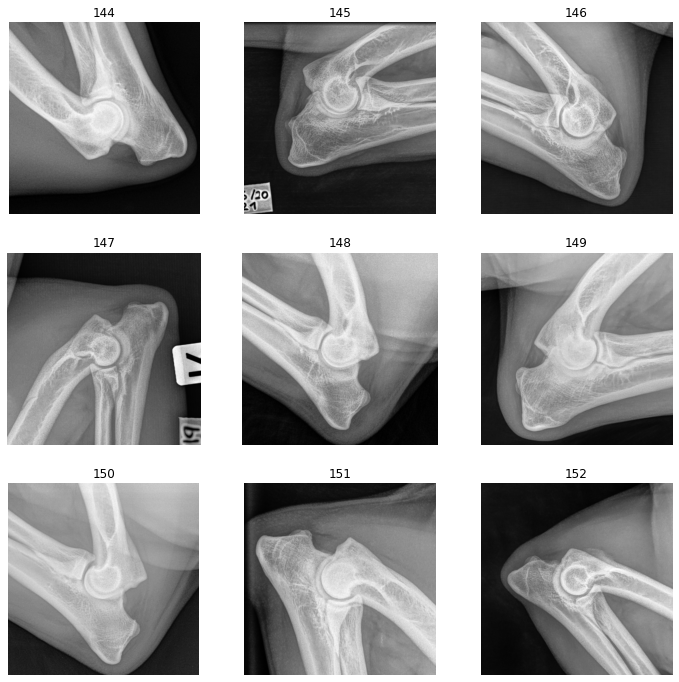

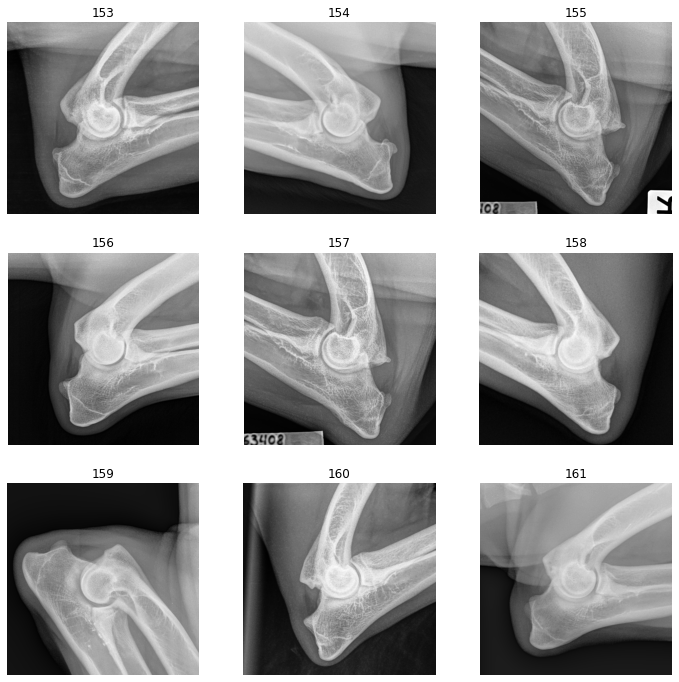

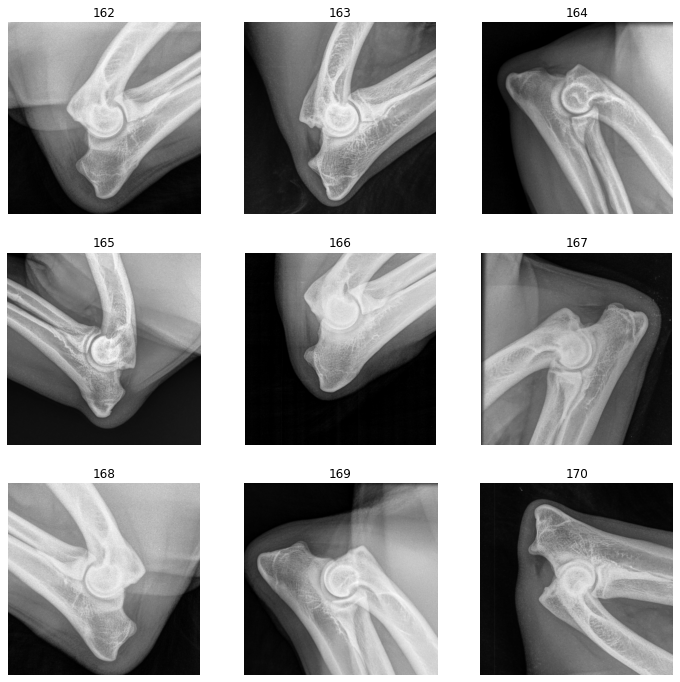

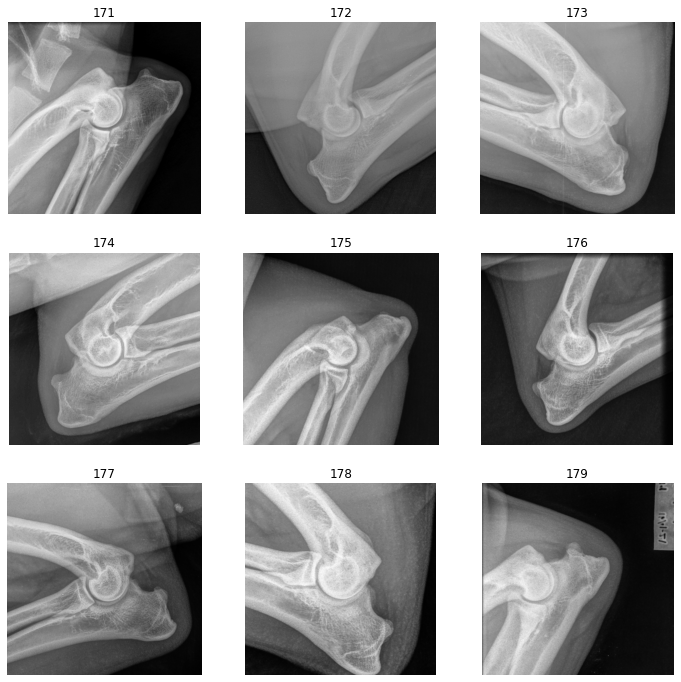

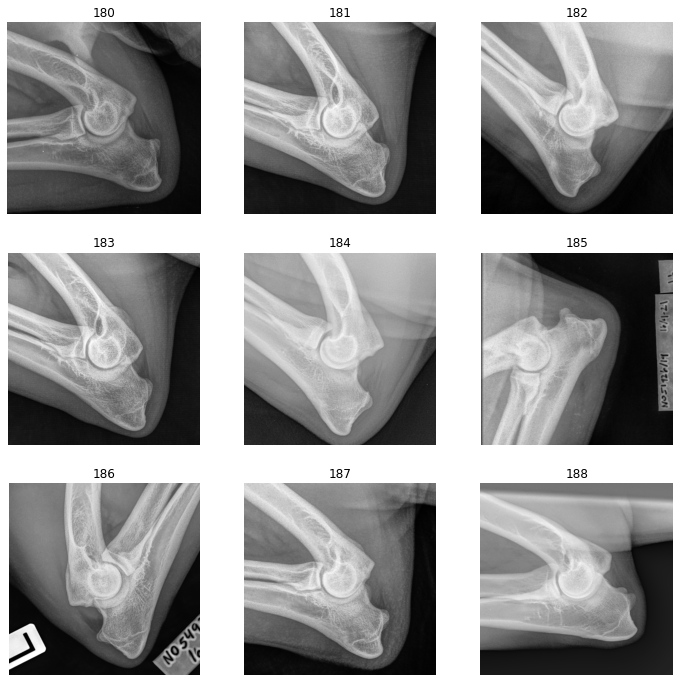

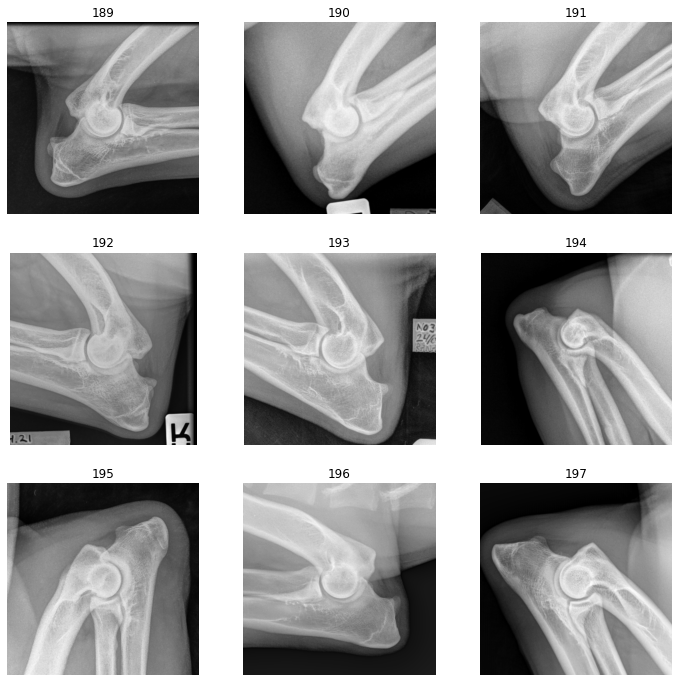

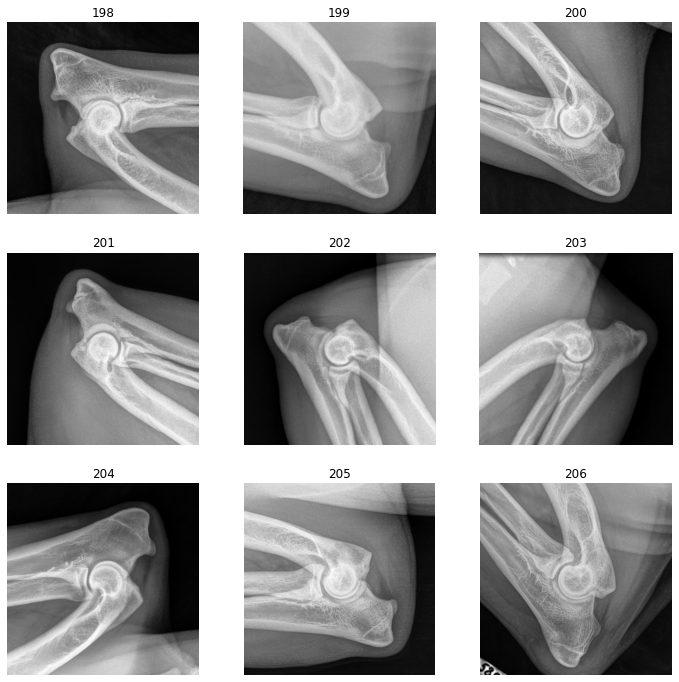

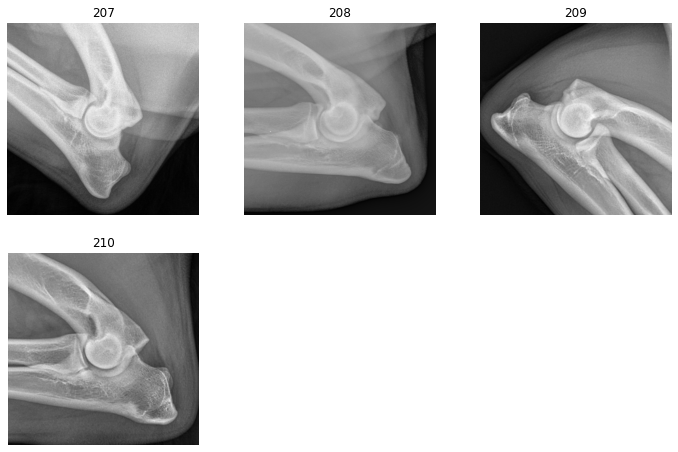

In [9]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [10]:
remove_indice = [13, 24, 28, 29, 30, 59, 85, 92]
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
206  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
207  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
208  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
209  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
210  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.7230010.3.0.3.5.1.12915466.275122826...      436      575   
1    1.2.276.0.7230010.3.0.3.5.1.12915467.308787911...      327      466   
2    1.2.276.0.82.1.1.1314.1304108018.192.168.1.48....     1588     1746   
3    1.2.276.0.82.1.1.1430.669053978.192.168.20.148...     1320     1504   
4             1.2.276.0.95.16003.20210920.105115.0.dcm      333      570   
..                                                 ...      ...      ...   
206  1.3.51.0.7.811581196.5821.63566.37889.29771.29...      642      801   
207  1.3.51.0.7.816869595.63744.15426.42854.50530.1...      776      981   
208  1.3.51.0.7.903272440.15569.57677.47066.26860.4...      777      973   
209  1.3.6.1.4.1.19179.1.1164174184218686.3.18993.1...      791      937   
210  1.3.6.1.4.1.19179.1.1164174184218686.3.28078.1...      772      915   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
0        556      695    0.999935    21          1    1, artrose  
1        904     1043    0.999985    21          1    1, artrose  
2       1806     1964    0.999988    21          1    1, artrose  
3       1109     1293    0.999995    21          1    1, artrose  
4        887     1123    0.996126    21          1    1, artrose  
..       ...      ...         ...   ...        ...           ...  
206      540      699    1.000000    21          1    1, artrose  
207     1348     1553    0.998437    21          1    1, artrose  
208     1676     1872    0.999926    21          1    1, artrose  
209      719      865    0.999978    21          1    1, artrose  
210      802      944    0.999990    21          1    1, artrose  

[203 rows x 10 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
new_detection_df.to_csv(filename_clean, index=False)